# Diabetes Prediction :

Project Members :

Bhumika Ostwal

Aishwarya Karandikar

Chaitali Kannurkar

Chetan Bajaj

In [1]:
#Run the html file in browser using python and execute frontend for project
import webbrowser

filename = 'localhost/datascienceproject/diabeticcompass.html'
webbrowser.open_new_tab(filename)


True

In [10]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
#Load dataset
df = pd.read_csv('E:/Project/diabetes_project.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Sex,Age,DiabetesPF,Smoker,HeartDisease,PhyActivity,Fruits,Alcohol,GenHealth,PhyHealth,Walk,Outcome
0,148,72,35,0,33.6,0,50,0.627,1,0,0,0,0,5,15,1,1
1,85,66,29,0,26.6,0,31,0.351,1,0,1,0,0,3,0,0,0
2,183,64,0,0,23.3,0,32,0.672,0,0,0,1,0,5,30,1,1
3,89,66,23,94,28.1,0,21,0.167,0,0,1,1,0,2,0,0,0
4,137,40,35,168,43.1,0,33,2.288,0,0,1,1,0,2,0,0,1


In [12]:
#Column names
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Sex',
       'Age', 'DiabetesPF', 'Smoker', 'HeartDisease', 'PhyActivity', 'Fruits',
       'Alcohol', 'GenHealth', 'PhyHealth', 'Walk', 'Outcome'],
      dtype='object')

In [13]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   SkinThickness  768 non-null    int64  
 3   Insulin        768 non-null    int64  
 4   BMI            768 non-null    float64
 5   Sex            768 non-null    int64  
 6   Age            768 non-null    int64  
 7   DiabetesPF     768 non-null    float64
 8   Smoker         768 non-null    int64  
 9   HeartDisease   768 non-null    int64  
 10  PhyActivity    768 non-null    int64  
 11  Fruits         768 non-null    int64  
 12  Alcohol        768 non-null    int64  
 13  GenHealth      768 non-null    int64  
 14  PhyHealth      768 non-null    int64  
 15  Walk           768 non-null    int64  
 16  Outcome        768 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 102.1 KB


In [14]:
#Describe mathematical computations
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Sex,Age,DiabetesPF,Smoker,HeartDisease,PhyActivity,Fruits,Alcohol,GenHealth,PhyHealth,Walk,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.352865,33.240885,0.471876,0.468750,0.125000,0.621094,0.580729,0.033854,2.861979,5.916667,0.304688,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.478172,11.760232,0.331329,0.499348,0.330934,0.485431,0.493761,0.180972,1.098399,10.043495,0.460575,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.000000,24.000000,0.243750,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.372500,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,1.000000,41.000000,0.626250,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,7.000000,1.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,1.000000,81.000000,2.420000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,1.000000,1.000000


In [15]:
#Transpose of describe matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Sex,768.0,0.352865,0.478172,0.000,0.00000,0.0000,1.00000,1.00
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
DiabetesPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Smoker,768.0,0.468750,0.499348,0.000,0.00000,0.0000,1.00000,1.00
HeartDisease,768.0,0.125000,0.330934,0.000,0.00000,0.0000,0.00000,1.00


In [19]:
#Check whether there are any null values in dataset
df.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Sex              0
Age              0
DiabetesPF       0
Smoker           0
HeartDisease     0
PhyActivity      0
Fruits           0
Alcohol          0
GenHealth        0
PhyHealth        0
Walk             0
Outcome          0
dtype: int64

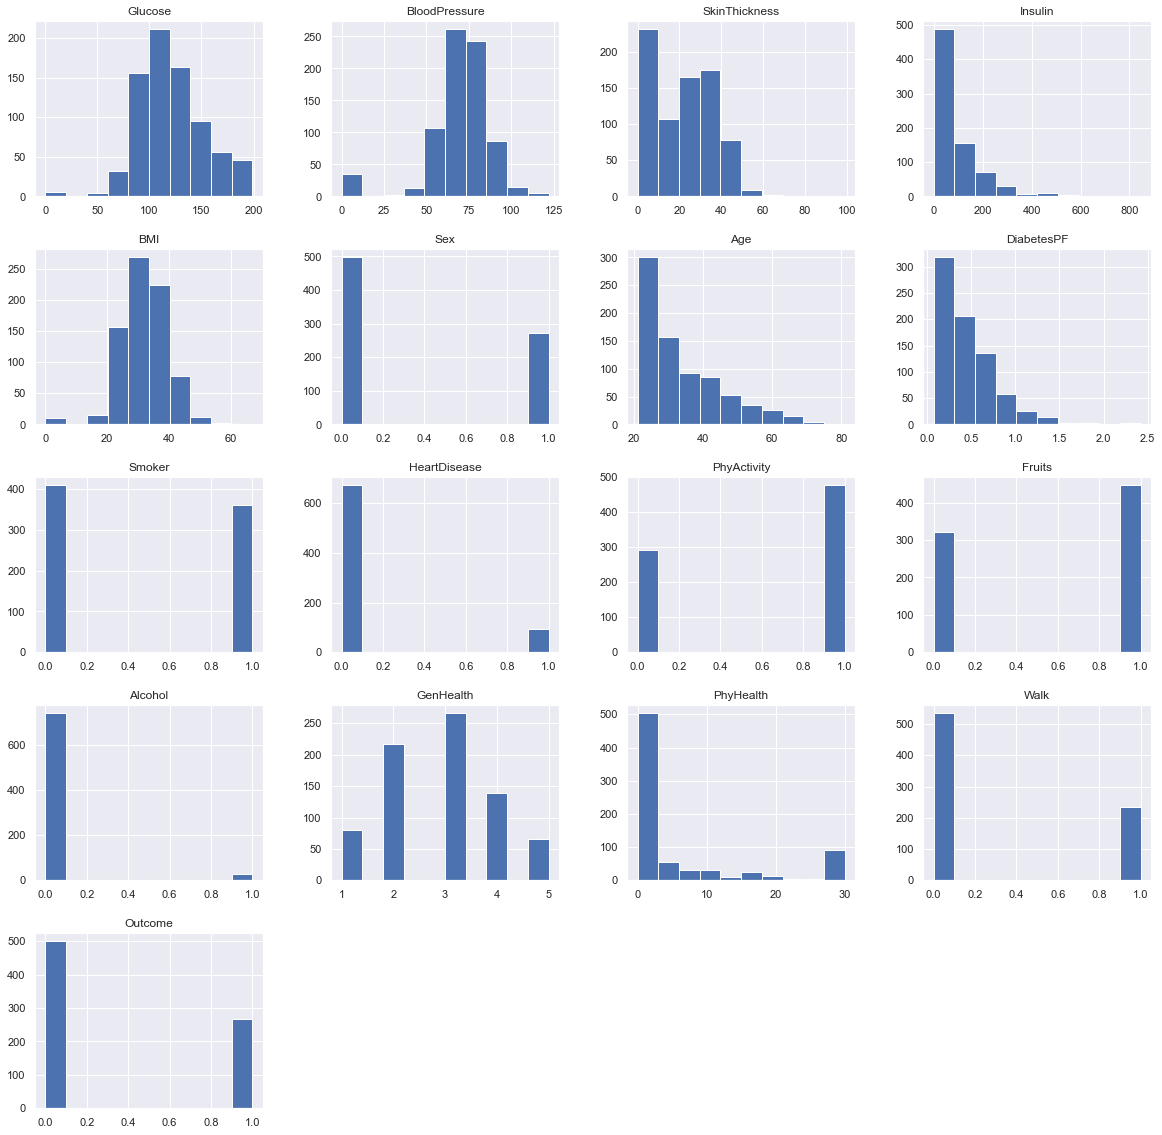

In [20]:
p = df.hist(figsize = (20,20))

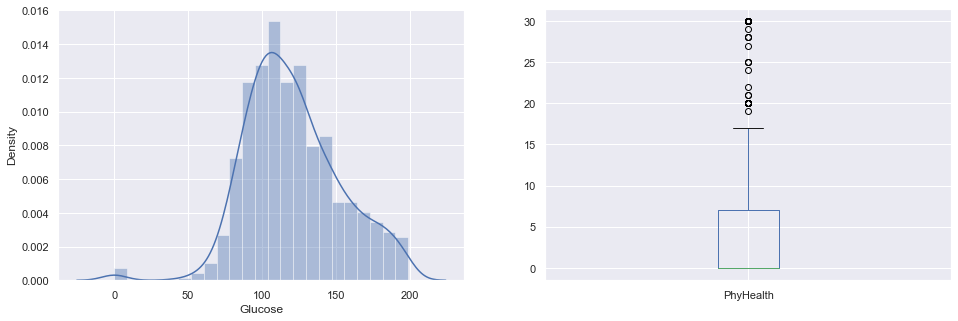

In [18]:
#Plot subplots 
plt.subplot(121), sns.distplot(df['Glucose'])
plt.subplot(122), df['PhyHealth'].plot.box(figsize=(16,5))
plt.show()

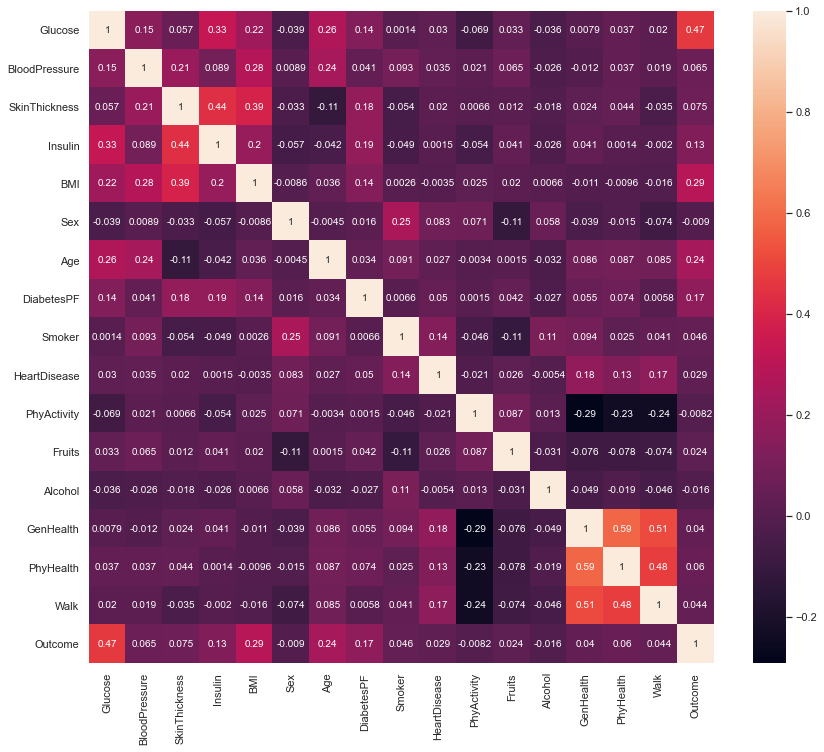

In [23]:
#Plot heatmap for data to check correlation of variables
plt.figure(figsize=(14,12))
p = sns.heatmap(df.corr(), annot=True)

# Applying models on data:

Logistic Regression :

In [24]:
#Dividing data into x and y
feature_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPF','Sex','Age','Smoker','HeartDisease','PhyActivity','Fruits','Alcohol','GenHealth','PhyHealth','Walk']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [25]:
#Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predict
y_pred=logreg.predict(X_test)

In [27]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[132,  25],
       [ 44,  30]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

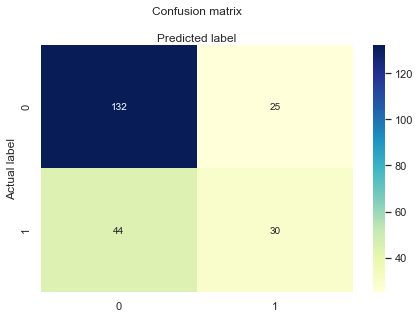

In [28]:
#Plot subplot of confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7012987012987013
Precision: 0.5454545454545454
Recall: 0.40540540540540543


Random Forest :

In [30]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=7)

In [32]:
#Using Ensemble and RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [34]:
#Accuracy
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7445887445887446


In [35]:
#Report and Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[119  28]
 [ 31  53]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.65      0.63      0.64        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Decision Tree :

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.70995670995671


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[112  35]
 [ 32  52]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.60      0.62      0.61        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



SVM(Support Vector Machine) :

In [38]:
#Fit model
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [39]:
svc_pred = svc_model.predict(X_test)

In [40]:
#Accuracy Score :
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7619047619047619


After applying all three of the above models on sugar level dataset for predicting diabetic or non-diabetic, we observed that SVM has highest accuracy.